In [1]:
#Importing the required libraries
from PIL import Image
import fitz
import io

In [2]:
#path to the old drawing 
old_dwg = "PD511259_02.pdf"

In [3]:
#path to the new drawing 
mod_dwg = "PD511259_03.pdf"

In [7]:
#converting pdf to image
def pdftoimg(pdf_file):
    doc = fitz.open(pdf_file)
    page = doc.loadPage(0) #loading the first page
    pix = page.getPixmap()  #converting the page to image
    img = pix.getPNGData() #this will be in bytes format
    img = Image.open(io.BytesIO(img)) #converting bytes to PIL image format
    return(img)
    

(1584, 1224)


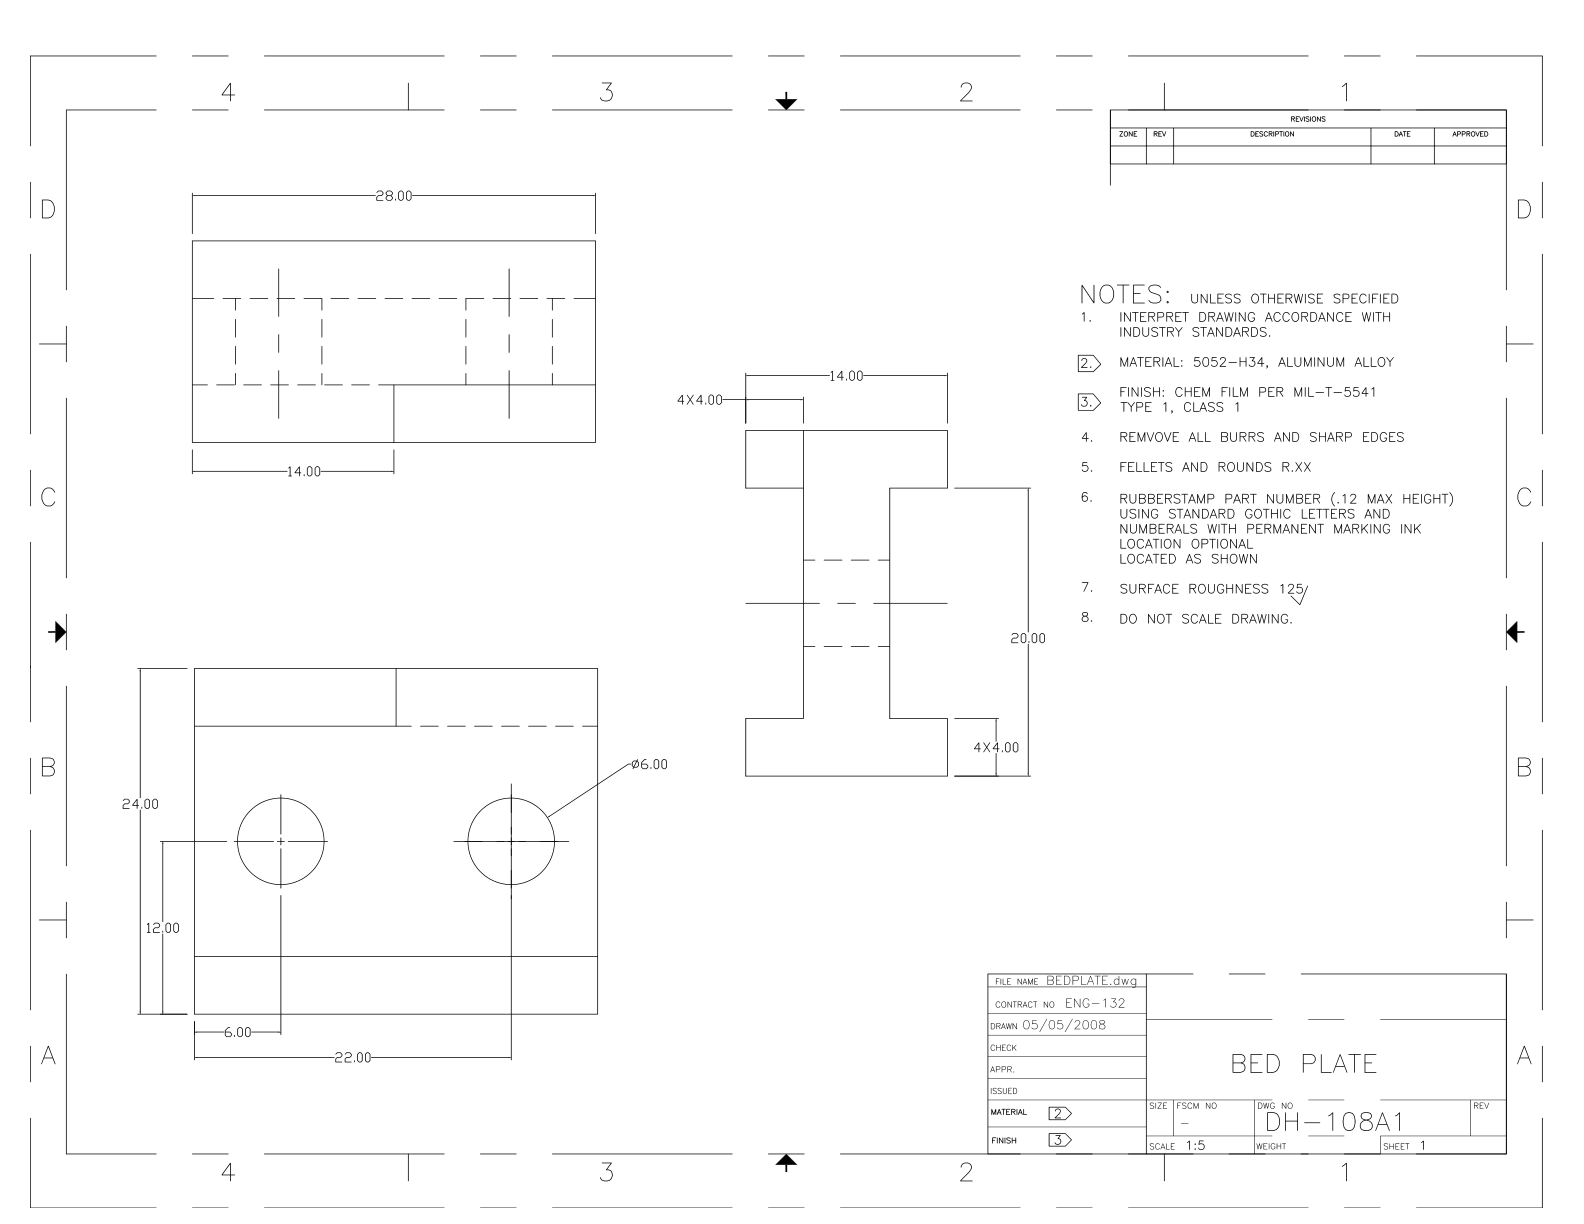

In [8]:
#display old drawing
old_dwg_img = pdftoimg(old_dwg)
print(old_dwg_img.size)

old_dwg_img

(1584, 1224)


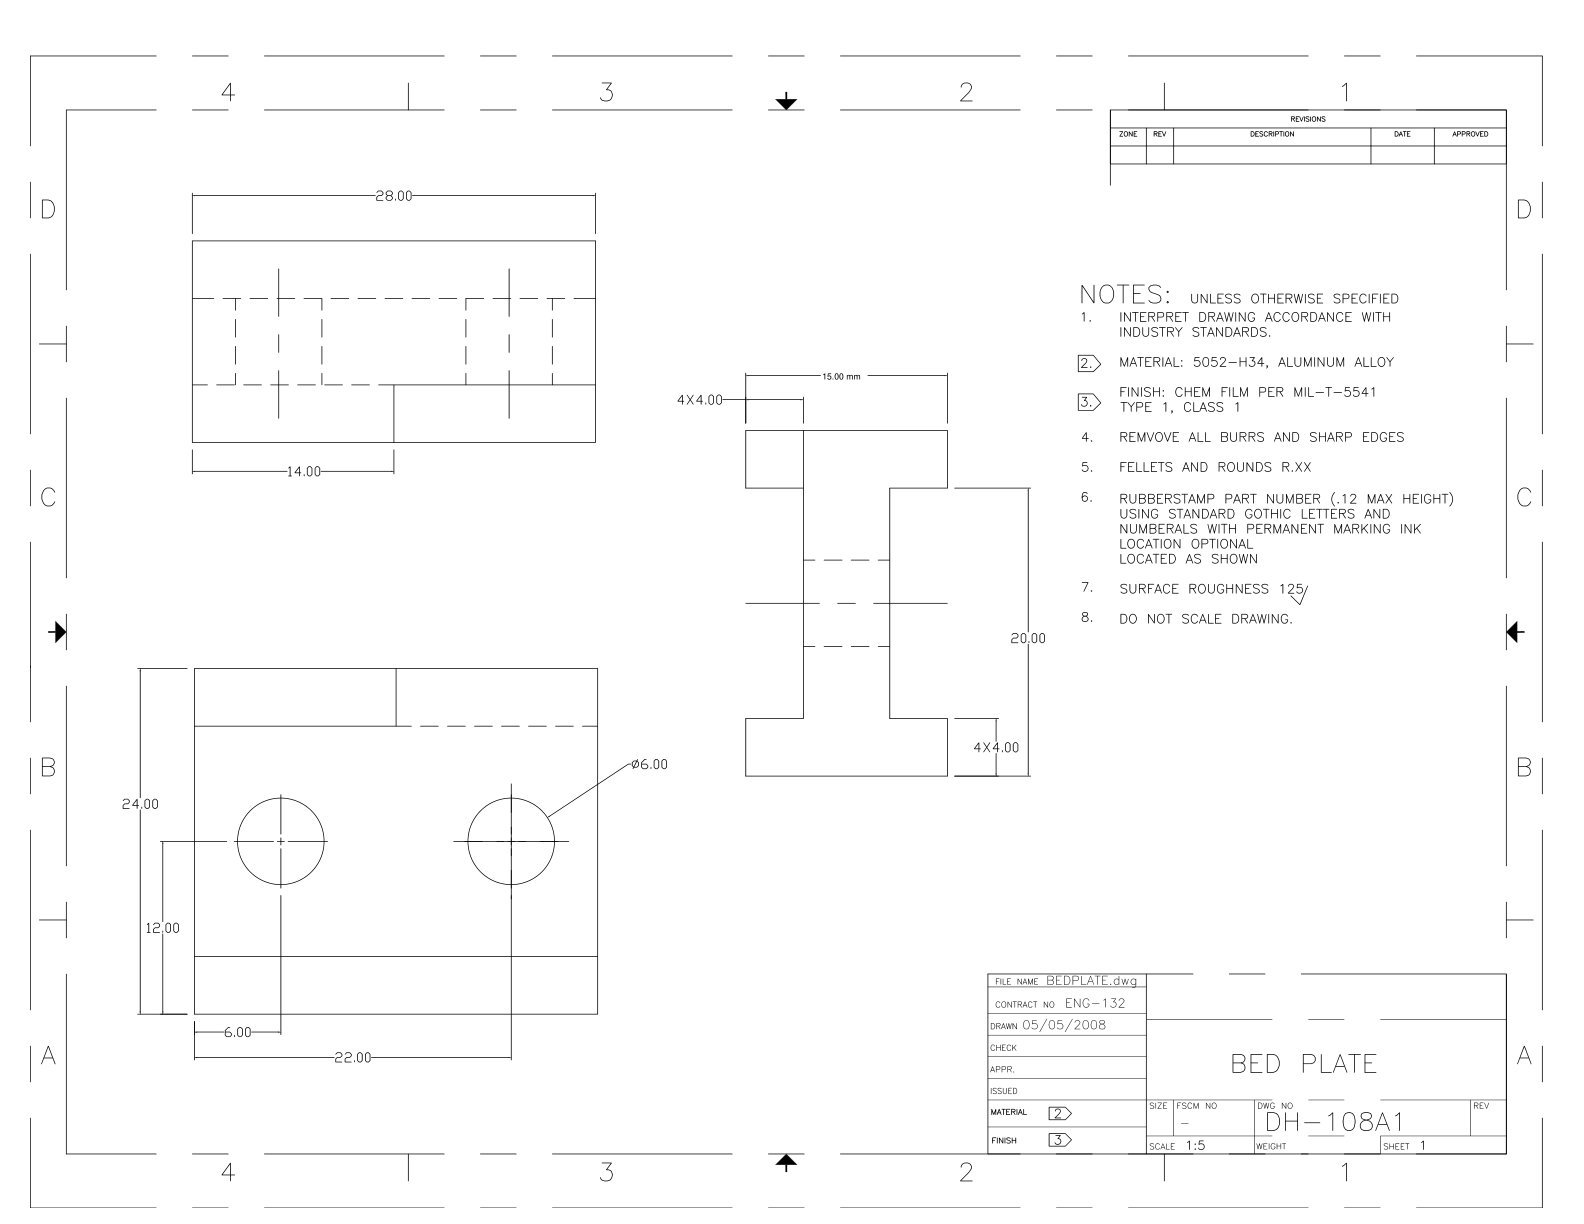

In [9]:
#display mod drawing
mod_dwg_img = pdftoimg(mod_dwg)
print(mod_dwg_img.size)
mod_dwg_img

In [10]:
#making the image transparent
def make_image_transparent(image):
    
    img = image.convert("RGBA")
    datas = img.getdata()   #getting the pixel values
    newData = []
    
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:    #if color is white
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    
    img.putdata(newData)
    
    return img


In [11]:
transparent_old = make_image_transparent(old_dwg_img)
transparent_mod = make_image_transparent(mod_dwg_img)


In [12]:
#comparing the images
def compare_image(image1, image2):
    img1 = image1.convert("RGBA")
    img2 = image2.convert("RGBA")
    datas1 = img1.getdata()
    datas2 = img2.getdata()

    newData = []
    for i in range(0, len(datas1)):
        if datas1[i]==datas2[i]:
            newData.append(datas1[i])
        else:
            newData.append((255, 0, 0))
            
    
            
    img2.putdata(newData)

            
    return img2

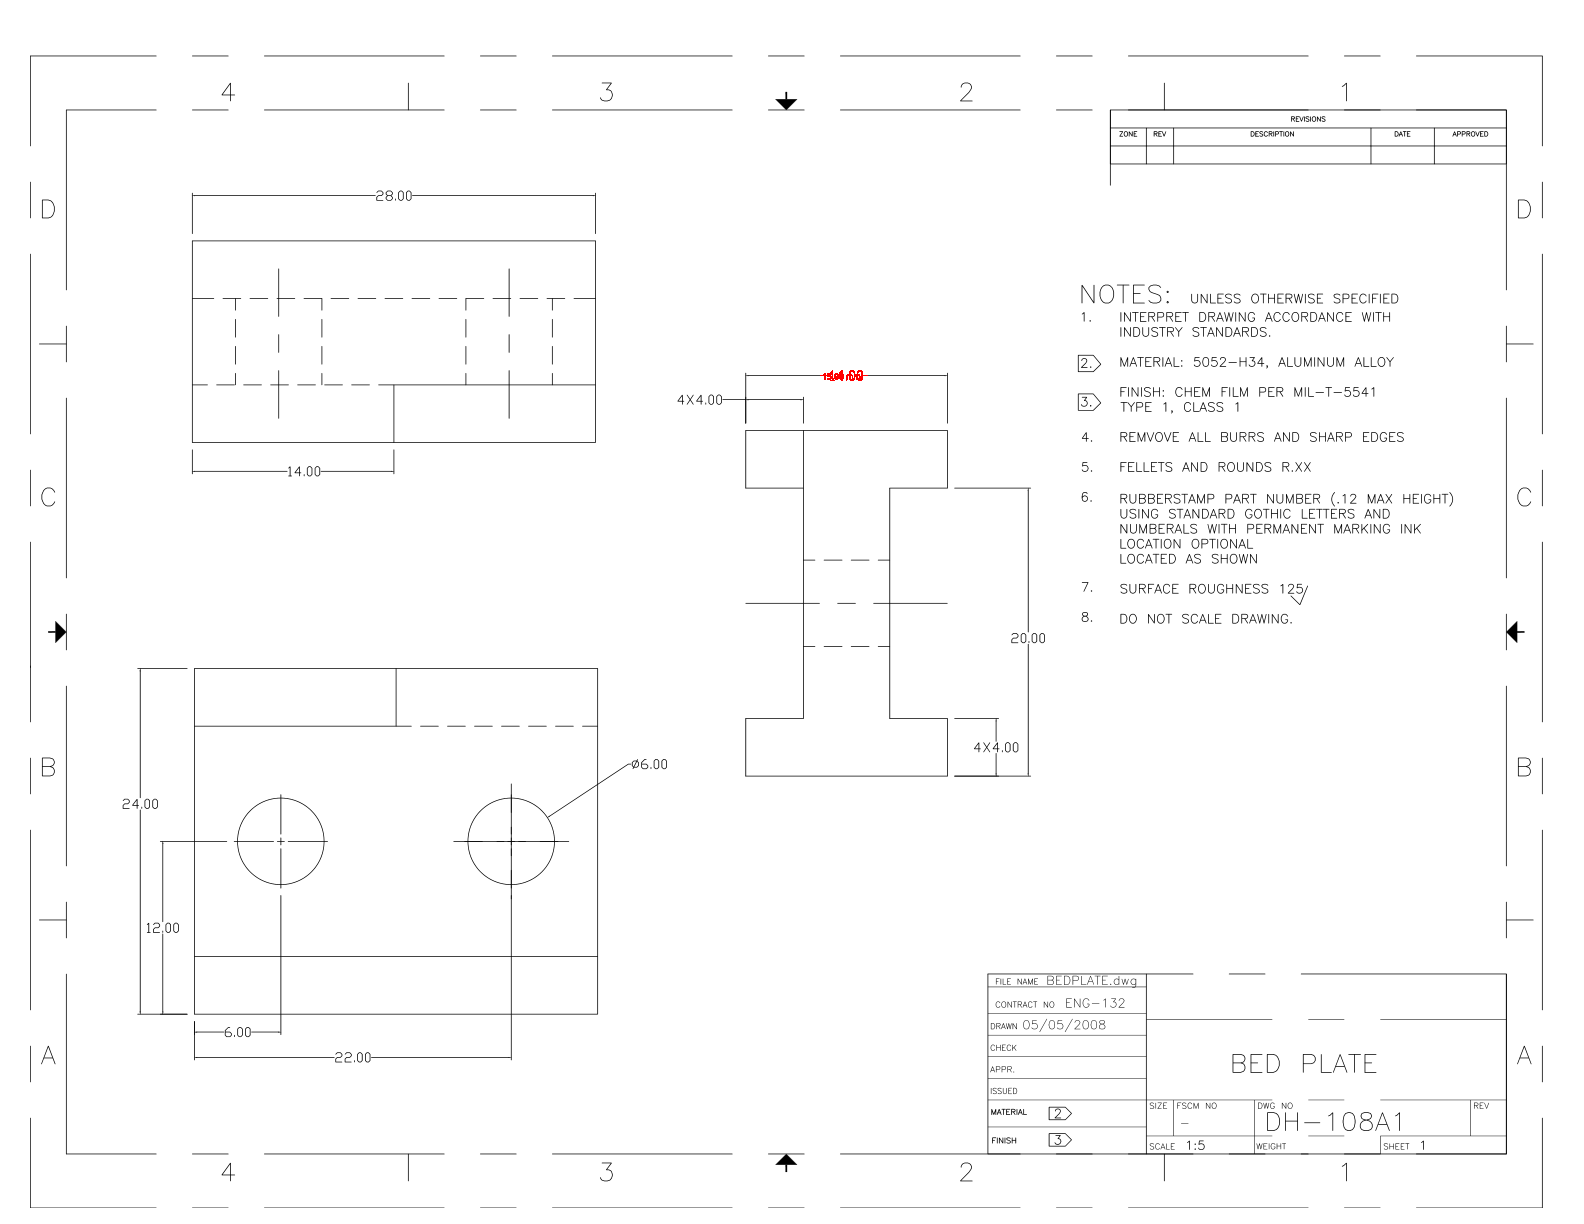

In [13]:
#comparing the image
compare_image(transparent_old, transparent_mod)

Between the two drawings, only the dimension highlighted in red color is different. Hence the person who is checking the drawing can only focus on the this area to check the drawing. Remaining area is same as previous, hence no need to check. This simple tool reduces the drawing checking time drastically (almost by 90%)